alpha =  2800
beta =  250
epsilon.mean =  49.72923969761781


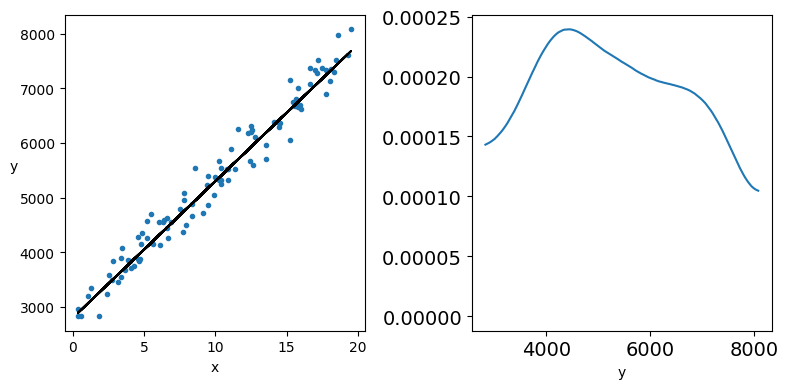

In [29]:
import pandas as pd
import pymc as pm
import arviz as az
import numpy as np
from matplotlib import pyplot as plt

observations = 100
min_experience = 0
max_experience = 20
true_alpha = 2800
true_beta = 250
true_epsilon = np.random.normal(0, 250, size=observations)

x = np.random.uniform(0, 20, observations)

true_y = true_beta * x + true_alpha
y = true_y + true_epsilon

print('alpha = ', true_alpha)
print('beta = ', true_beta)
print('epsilon.mean = ', np.mean(true_epsilon))

_, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, true_y, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()
plt.show()

X_std = x.std()
X_mean = x.mean()
Y_std = y.std()
Y_mean = y.mean()

x_standard = (x - X_mean) / X_std
y_standard = (y - Y_mean) / Y_std

x_prime = x - X_mean


Output()

Output()

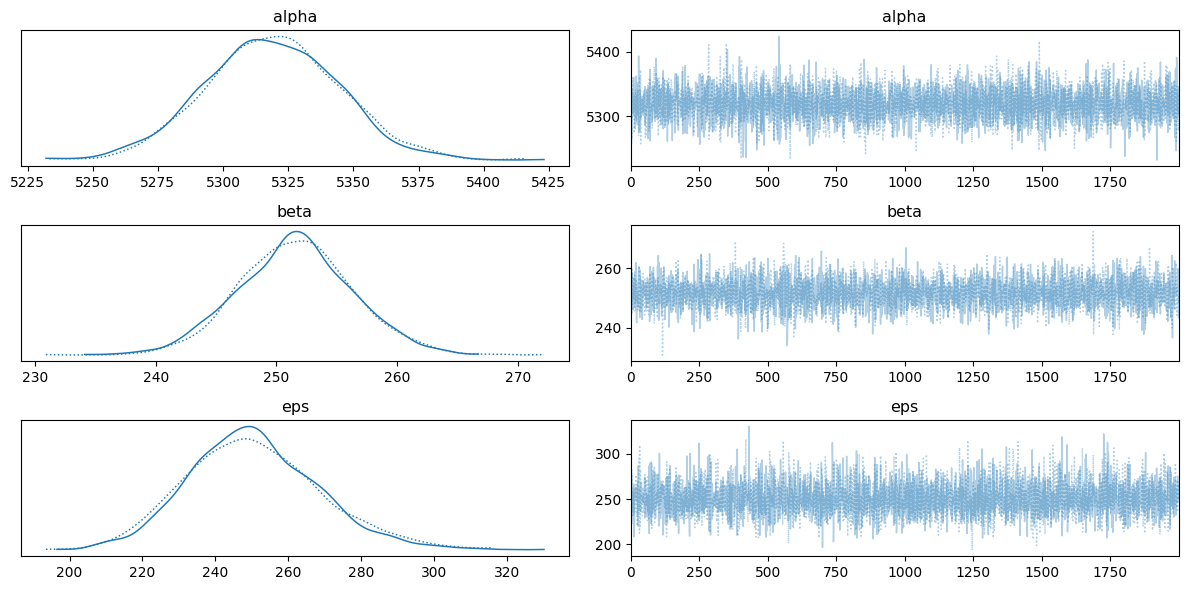

In [42]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10000)
    beta = pm.Normal('beta', mu=0, sigma=1000)
    eps = pm.HalfCauchy('eps', 3000)
    mu = alpha + beta * x_prime
    y_pred = pm.Normal('y_pred', mu=mu, sigma=eps, observed=y)
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

pm.plot_trace(trace)
plt.tight_layout()
plt.show()

Infered alpha: 2834.256395703503, Infered beta: 251.59795065043656
True alpha: 2800, True beta: 250


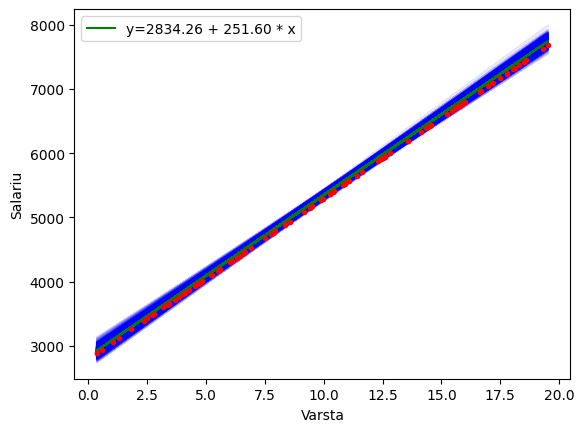

In [40]:
alpha_m = trace.posterior['alpha'].mean().item()
beta_m = trace.posterior['beta'].mean().item()

# infered alpha and beta
i_alpha = alpha_m - beta_m * x.mean().item()
i_beta = beta_m


print(f'Infered alpha: {i_alpha}, Infered beta: {i_beta}')
print(f'True alpha: {true_alpha}, True beta: {true_beta}')


posterior_g = trace.posterior.stack(samples={"chain", "draw"})
draws = range(0, posterior_g.samples.size, 10)
post_a = posterior_g['alpha'][draws].values
post_b = posterior_g['beta'][draws].values
plt.plot(x, post_a - post_b * x.mean() + post_b * x[:, None], color='blue', alpha=0.1)
plt.plot(x, i_alpha + i_beta * x, color='green', label=f'y={i_alpha:.2f} + {i_beta:.2f} * x')
plt.xlabel('Varsta')
plt.ylabel('Salariu')
plt.plot(x, true_y, color='red', marker='.', linestyle='None')
plt.legend()
plt.show()